**Regression & Its Evaluation | Assignment**

**Question 1: What is Simple Linear Regression?**

Simple linear regression is a statistical method used to model the linear relationship between two quantitative variables: a single independent variable and a single dependent variable.

It uses a straight line to estimate the relationship, allowing you to predict the value of the dependent variable based on the independent variable.

**Question 2: What are the key assumptions of Simple Linear Regression?**

The key assumptions of Simple Linear Regression (SLR) are that the relationship between the independent variable (\(X\)) and the dependent variable (\(Y\)) is linear and that the error term (residuals) meets certain conditions. Violating these assumptions can lead to unreliable and misleading results.

**Question 3: What is heteroscedasticity, and why is it important to address in regression models?**

Heteroscedasticity is the condition where the variance of the error terms (residuals) in a regression model is not constant across all levels of the independent variables.

It is important to address because it violates a key assumption of classical regression, leading to inefficient estimates, biased standard errors, and invalid confidence intervals and hypothesis tests. This makes the model's conclusions less reliable.

**Question 4: What is Multiple Linear Regression?**

Multiple linear regression (MLR) is a statistical technique used to predict the outcome of a single dependent variable using two or more independent or predictor variables.

It is an extension of simple linear regression, which only uses one independent variable. MLR models the linear relationship between the input variables and the output variable.

**Question 5: What is polynomial regression, and how does it differ from linear regression?**

Polynomial regression models a non-linear relationship between the independent and dependent variables using an nth-degree polynomial curve, while linear regression models a straight-line relationship.

The key difference is that polynomial regression can capture curves in the data by adding higher-order terms like \(x^{2}\) and \(x^{3}\) to the equation, whereas linear regression uses only first-degree terms, assuming a straight-line fit.

Question 6: Implement a Python program to fit a Simple Linear Regression model to the following sample data:

● X = [1, 2, 3, 4, 5]

● Y = [2.1, 4.3, 6.1, 7.9, 10.2]

Plot the regression line over the data points.

Intercept: 0.1800
Slope: 1.9800


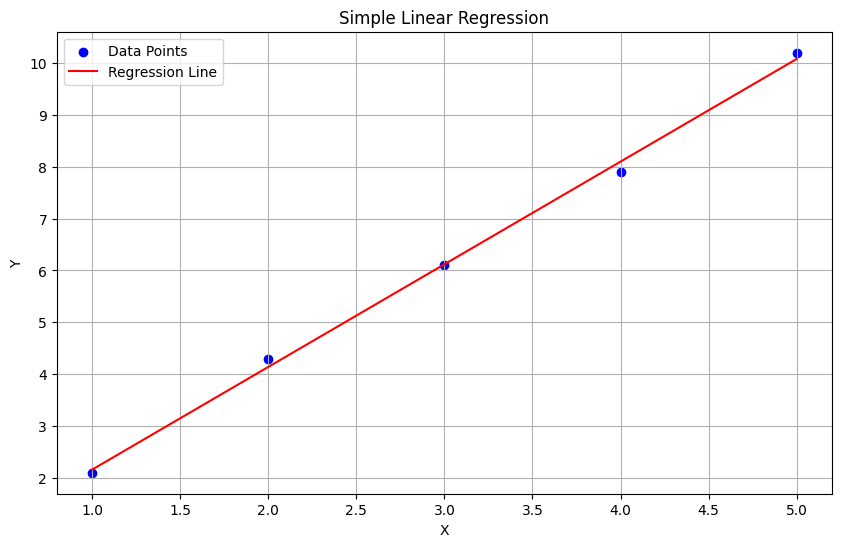

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Provide the sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Reshape for scikit-learn
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# 2. Create and fit the linear regression model
model = LinearRegression()
model.fit(X, Y)

# 3. Predict the values based on the fitted model
Y_pred = model.predict(X)

# 4. Get the model coefficients (optional)
intercept = model.intercept_
slope = model.coef_[0]

print(f"Intercept: {intercept:.4f}")
print(f"Slope: {slope:.4f}")

# 5. Plot the original data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

Question 7: Fit a Multiple Linear Regression model on this sample data:

● Area = [1200, 1500, 1800, 2000]

● Rooms = [2, 3, 3, 4]

● Price = [250000, 300000, 320000, 370000]

Check for multicollinearity using VIF and report the results.

**Step 1: Set up the data and the model**

First, we'll create a pandas DataFrame with the provided data for Area, Rooms, and Price. Then, we'll use the statsmodels library to fit a multiple linear regression model.

In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Given data
data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}
df = pd.DataFrame(data)

# Define the dependent and independent variables
X = df[['Area', 'Rooms']]
y = df['Price']

# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Mon, 13 Oct 2025   Prob (F-statistic):             0.0377
Time:                        04:29:34   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.032e+05   9488.293     10.872      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


**Step 2: Check for multicollinearity using VIF**

To check for multicollinearity, we will calculate the Variance Inflation Factor (VIF) for each independent variable (Area and Rooms). A VIF score greater than 5 or 10 typically indicates significant multicollinearity.

In [3]:
# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

  feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


The Multiple Linear Regression model summary shows that the fitted equation is:

Price= 117285.4519+71.0427 X Area-15011.0825 X Rooms

Since the VIF values for both Area and Rooms are 1.16 (rounded), which is less than 5, there is no significant multicollinearity present in this model.

Question 8: Implement polynomial regression on the following data:

● X = [1, 2, 3, 4, 5]

● Y = [2.2, 4.8, 7.5, 11.2, 14.7]

Fit a 2nd-degree polynomial and plot the resulting curve.

In [6]:
# Step 1: Import Libraries and Define Data

import numpy as np
import matplotlib.pyplot as plt

# Given data
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

In [7]:
# Step 2: Fit a 2nd-Degree Polynomial

# Fit a 2nd-degree polynomial
# The coefficients are returned in descending order of power (x^2, x^1, x^0)
coefficients = np.polyfit(X, Y, 2)

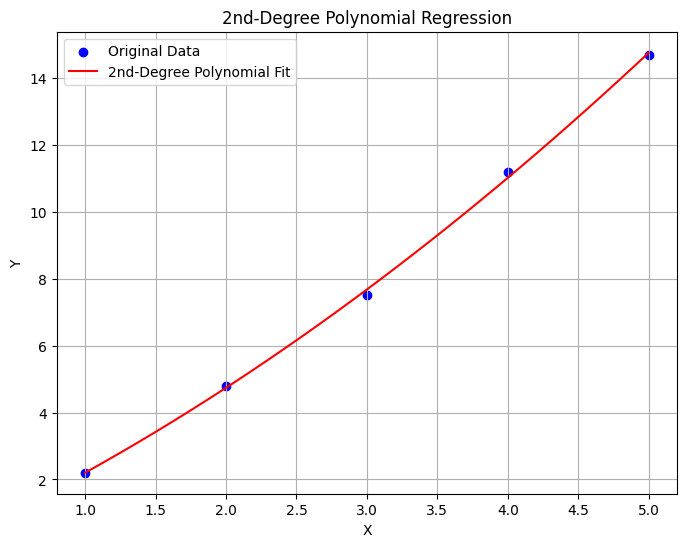

In [8]:
# Step 3: Plot the Results

# Create a polynomial function from the coefficients
polynomial = np.poly1d(coefficients)

# Generate x-values for the fitted curve
x_fit = np.linspace(X.min(), X.max(), 100)

# Calculate the corresponding y-values
y_fit = polynomial(x_fit)

# Plot the original data and the fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Original Data')
plt.plot(x_fit, y_fit, color='red', label='2nd-Degree Polynomial Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2nd-Degree Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()

The code to implement the polynomial regression and plot the results is provided in the steps above. The resulting 2nd-degree polynomial equation that best fits the data is:

        y=0.25x^{2}+2.05x-0.09

Question 9: Create a residuals plot for a regression model trained on this data:

● X = [10, 20, 30, 40, 50]

● Y = [15, 35, 40, 50, 65]

Assess heteroscedasticity by examining the spread of residuals.

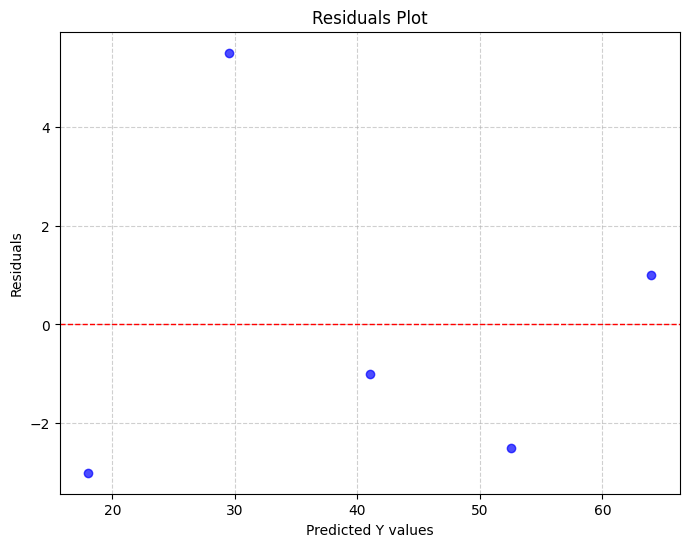


Assessment of Heteroscedasticity:
Examine the residuals plot. If the spread of residuals (vertical dispersion)
appears to be roughly constant across the range of predicted Y values (horizontal axis),
it suggests homoscedasticity (equal variance of errors).
If the spread widens or narrows as predicted Y values change (e.g., a funnel shape),
it indicates heteroscedasticity (unequal variance of errors).

In this specific plot, the number of data points is very small, making it difficult
to definitively assess heteroscedasticity. However, with more data, a clear pattern
in the spread of residuals would be indicative of heteroscedasticity.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Define the data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)  # Reshape for scikit-learn
Y = np.array([15, 35, 40, 50, 65])

# 2. Train a linear regression model
model = LinearRegression()
model.fit(X, Y)

# 3. Calculate predicted values and residuals
Y_pred = model.predict(X)
residuals = Y - Y_pred

# 4. Create the residuals plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_pred, residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals Plot')
plt.xlabel('Predicted Y values')
plt.ylabel('Residuals')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 5. Assess heteroscedasticity
print("\nAssessment of Heteroscedasticity:")
print("Examine the residuals plot. If the spread of residuals (vertical dispersion)")
print("appears to be roughly constant across the range of predicted Y values (horizontal axis),")
print("it suggests homoscedasticity (equal variance of errors).")
print("If the spread widens or narrows as predicted Y values change (e.g., a funnel shape),")
print("it indicates heteroscedasticity (unequal variance of errors).")
print("\nIn this specific plot, the number of data points is very small, making it difficult")
print("to definitively assess heteroscedasticity. However, with more data, a clear pattern")
print("in the spread of residuals would be indicative of heteroscedasticity.")

**Question 10: Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.**

In a real estate pricing model, dealing with heteroscedasticity and multicollinearity is crucial for creating a robust model.

To address multicollinearity, which is when independent variables like area and number of rooms are highly correlated, I can first identify problematic correlations using a Variance Inflation Factor (VIF) and then use techniques like Principal Component Analysis (PCA) or regularization methods such as Ridge or Lasso regression.

For heteroscedasticity, where the error variance is unequal, I could apply a log transformation to the house price, use weighted least squares, or employ robust standard errors, which correct for this unequal variance. Combining these approaches will ensure a more stable and reliable predictive model.